In [6]:
import scipy as sp
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt


In [9]:
#python3 -m pip install -U scikit-image       #helped import data
from skimage import data  

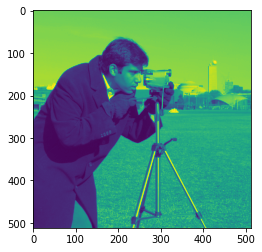

<ipython-input-15-59350fc1de35>:12: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  output = sp.zeros(LoG.shape)


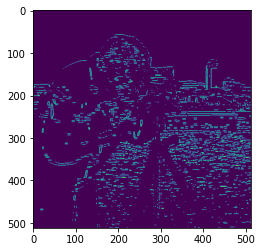

In [15]:

# lena = sp.misc.lena() this function was deprecated in version 0.17
img = data.camera()  # use a standard image from skimage instead
plt.imshow(img)
plt.show()
LoG = nd.gaussian_laplace(img , 2)
#scipy.ndimage.gaussian_laplace computes LoG, Multidimensional Laplace filter 
#using Gaussian second derivatives.
#parameter 2 in this case is the standard deviations of the Gaussian filter 
#thres = np.absolute(LoG).mean() * 0.75 #Calculating threshold for local LoG difference
thres = np.absolute(LoG).mean() * 0.70 #Calculating threshold for local LoG difference

output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2] #convolution matrix patch 
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        #Because the signal has crossed through the point of zero, it is called 
        #a zero-crossing.  potential edge point
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            #Edge pixels = zero crossing && local difference > threshold
            output[y, x] = 1

plt.imshow(output)
plt.show()

In [14]:
print(LoG)
print(LoG.shape)
print(output)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 102 111 119]
 [  0   0   0 ... 125 137 146]
 [  0   0   0 ... 175 204 222]]
(512, 512)
